In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
# %matplotlib widget

import os

import statsmodels.tools.eval_measures as bias
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')
df_5 = df.resample('5T').mean()
df_5.head()

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5547.831152,4353.258496,4927.916309,1355.909058,1697.601026,3396.820703,920.982605
2010-01-01 00:05:00,5535.618164,4348.893457,4916.344433,1353.716626,1699.889233,3397.829590,918.181799
2010-01-01 00:10:00,5529.010351,4331.776856,4897.709473,1346.924121,1697.138647,3424.317334,916.371033
2010-01-01 00:15:00,5514.982032,4330.051758,4879.650098,1346.241382,1705.324194,3421.112500,916.161291
2010-01-01 00:20:00,5472.567285,4314.503906,4863.172266,1334.846802,1674.401562,3409.312451,914.513721


In [3]:
df_serie4 = df_5[['SERIE4']]

In [4]:
df_serie4['index'] = range(len(df_serie4))
df_serie4.iloc[49247:75743]

/tmp/ipykernel_6581/1904033931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie4['index'] = range(len(df_serie4))


,SERIE4,index
Date,,
2010-06-20 23:55:00,2828.664111,49247
2010-06-21 00:00:00,2830.813281,49248
2010-06-21 00:05:00,2827.722998,49249
2010-06-21 00:10:00,2829.968164,49250
2010-06-21 00:15:00,2830.823340,49251
...,...,...
2010-09-20 23:30:00,3040.164892,75738
2010-09-20 23:35:00,3033.962793,75739
2010-09-20 23:40:00,3024.287891,75740


In [5]:
## Directorio de Figuras
dir = 'results/imgs/'
#!mkdir results/imgs/

In [6]:
directory = 'results/data/Season A'
#!mkdir 'results/data/Season A'

dict_df = {}
for filename in os.listdir(directory):
    print(filename)
    f = os.path.join(directory, filename)
    model_name = filename.split('.')[0]
    # print(model_name)
    if 'X' in filename or 'HW' in filename or 'Per' in filename:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred']
        if 'X' in filename:
            df['index'] = range(49247, 49247 + 26520) ## rango completo 14688 49247 75743

    else:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred', 't_sel', 't_corr']
    
    df['model'] = model_name
    if df['y_pred'].dtype == 'object':
        df['y_pred'] = df['y_pred'].str.replace('[', '')
        df['y_pred'] = df['y_pred'].str.replace(']', '')
    df['y_pred'] = pd.to_numeric(df['y_pred'])
    df.set_index('index', inplace = True)
    
    dict_df.update({
        model_name : df
    })

XAnMA_Lasso.csv
XAn_Boost.csv
XAnMA_PLS_euc.csv
An_Boost.csv
XAn_PLS_euc.csv
AnMA_Ridge_euc.csv
XAn_PLS.csv
XAn_RF_euc.csv
An_OLS_euc.csv
An_PLS.csv
HWA.csv
An_OLS.csv
XAnMA_Ridge.csv
XAnMA_Bagg_euc.csv
XAnMA_Bagg.csv
AnMA_Ridge.csv
XAn_Ridge.csv
XAn_euc.csv
An_Bagg_euc.csv
XAnMA_PCR.csv
An_RF_euc.csv


/tmp/ipykernel_6581/1119425296.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
/tmp/ipykernel_6581/1119425296.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
/tmp/ipykernel_6581/1119425296.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
/tmp/ipykernel_6581/1119425296.py:23: FutureWarning: The default value of regex will change from True to False in a future vers

XAnMA_Boost.csv
XHWA.csv
XAn_Lasso_euc.csv
AnMA_Boost.csv
An_Ridge_euc.csv
XAnMA_RF.csv
An_Boost_euc.csv
AnMA_Lasso_euc.csv
An_Lasso_euc.csv
An_Lasso.csv
XAnMA_Lasso_euc.csv
XAn_Ridge_euc.csv
XAnMA_RF_euc.csv
AnMA_RF.csv
AnMA_Bagg.csv
HWM.csv


/tmp/ipykernel_6581/1119425296.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
/tmp/ipykernel_6581/1119425296.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
/tmp/ipykernel_6581/1119425296.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
/tmp/ipykernel_6581/1119425296.py:23: FutureWarning: The default value of regex will change from True to False in a future vers

An_Bagg.csv
An_PLS_euc.csv
AnMA_OLS_euc.csv
AnMA_PLS.csv
XHWM.csv
AnMA_PCR.csv
XARMA.csv
AnMA_Bagg_euc.csv
XAnMA_OLS_euc.csv
AnMA_Boost_euc.csv
AnMA_RF_euc.csv
XAn_PCR.csv
XAn_RF.csv
An_RF.csv
XAn_Boost_euc.csv
XAn_Bagg.csv
AnMA_OLS.csv
XAnMA_PLS.csv
AnMA_Lasso.csv
XAnMA_Ridge_euc.csv
XAnMA_Boost_euc.csv
XAnMA_OLS.csv
An_Ridge.csv
XAn_Bagg_euc.csv
An_PCR.csv
XAn_Lasso.csv
AnMA_PLS_euc.csv
XAn_OLS.csv


/tmp/ipykernel_6581/1119425296.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
/tmp/ipykernel_6581/1119425296.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
/tmp/ipykernel_6581/1119425296.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
/tmp/ipykernel_6581/1119425296.py:23: FutureWarning: The default value of regex will change from True to False in a future vers

In [7]:
# Persistente
df_serie4_sel = df_serie4.iloc[49247:75743]
df_serie4_per = df_serie4_sel.copy()
df_serie4_per.SERIE4 = df_serie4_sel.SERIE4.shift(periods=1, fill_value = df_serie4.iloc[49246].SERIE4)
df_serie4_per.rename(columns = {'SERIE4':'y_pred'}, inplace = True)
df_serie4_per['t_pred']=0.1
df_serie4_per['model']='Per'
df_serie4_per=df_serie4_per.set_index('index')
df_serie4_per

,y_pred,t_pred,model
index,,,
49247,2828.313135,0.1,Per
49248,2828.664111,0.1,Per
49249,2830.813281,0.1,Per
49250,2827.722998,0.1,Per
49251,2829.968164,0.1,Per
...,...,...,...
75738,3043.223877,0.1,Per
75739,3040.164892,0.1,Per
75740,3033.962793,0.1,Per


In [8]:
dict_df
dict_df["Per"] = df_serie4_per

In [9]:
from datetime import datetime as dt
from matplotlib import pyplot as plt, dates as mdates

In [10]:
df_serie4_copy = df_serie4.copy()
df_serie4_copy.reset_index(inplace=True)
df_serie4_copy

,Date,SERIE4,index
0,2010-01-01 00:00:00,1355.909058,0
1,2010-01-01 00:05:00,1353.716626,1
2,2010-01-01 00:10:00,1346.924121,2
3,2010-01-01 00:15:00,1346.241382,3
4,2010-01-01 00:20:00,1334.846802,4
...,...,...,...
200634,2011-11-28 15:30:00,1824.311914,200634
200635,2011-11-28 15:35:00,1832.722339,200635
200636,2011-11-28 15:40:00,1830.256812,200636
200637,2011-11-28 15:45:00,1824.559302,200637


In [11]:
dates_by_index = df_serie4_copy.iloc[dict_df['XAn_PCR'].index].Date
dates_by_index.iloc[61220- 49247:61777- 49247]

61220   2010-08-01 13:40:00
61221   2010-08-01 13:45:00
61222   2010-08-01 13:50:00
61223   2010-08-01 13:55:00
61224   2010-08-01 14:00:00
                ...        
61772   2010-08-03 11:40:00
61773   2010-08-03 11:45:00
61774   2010-08-03 11:50:00
61775   2010-08-03 11:55:00
61776   2010-08-03 12:00:00
Name: Date, Length: 557, dtype: datetime64[ns]

In [12]:
dict_df['XAn_PCR'].index

Int64Index([49247, 49248, 49249, 49250, 49251, 49252, 49253, 49254, 49255,
            49256,
            ...
            75757, 75758, 75759, 75760, 75761, 75762, 75763, 75764, 75765,
            75766],
           dtype='int64', name='index', length=26520)

In [13]:
df_serie4_sel_copy = df_serie4_sel.copy()
df_serie4_sel_copy.reset_index(inplace=True)
df_serie4_sel_copy

,Date,SERIE4,index
0,2010-06-20 23:55:00,2828.664111,49247
1,2010-06-21 00:00:00,2830.813281,49248
2,2010-06-21 00:05:00,2827.722998,49249
3,2010-06-21 00:10:00,2829.968164,49250
4,2010-06-21 00:15:00,2830.823340,49251
...,...,...,...
26491,2010-09-20 23:30:00,3040.164892,75738
26492,2010-09-20 23:35:00,3033.962793,75739
26493,2010-09-20 23:40:00,3024.287891,75740
26494,2010-09-20 23:45:00,3021.757666,75741


In [14]:
x=4100
[57120+x,57390+1.07*x]

[61220, 61777.0]

In [15]:
import matplotlib.dates as mdates

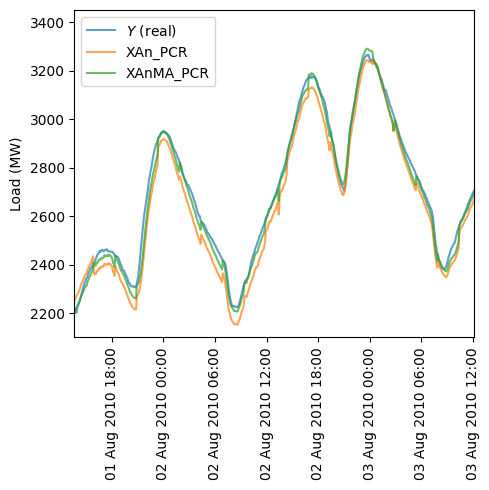

In [16]:
dict_best=(['XAn_PCR','XAnMA_PCR'] )
plt.figure(figsize=(5, 5))
ax = plt.gca()
myFmt = mdates.DateFormatter("%d %b %Y %H:%M")
ax.xaxis.set_major_formatter(myFmt)
plt.plot(df_serie4_sel_copy.Date, df_serie4_sel_copy.SERIE4, label='$Y$ (real)', alpha = 0.7)
for k in dict_best:
    dict_df[k]['Date'] = dates_by_index
    plt.plot(dict_df[k].Date, dict_df[k].y_pred, label=k, alpha = 0.7, markersize=4)#,marker='x'

plt.xlim(dates_by_index.iloc[[61220- 49247,61777- 49247]])
plt.xticks(rotation = 90)
plt.ylim([2100,3450])
# plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence') FAIL!
plt.ylabel('Load (MW)')

plt.legend()
# plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.savefig(dir+'episode2.pdf', transparent=True)
plt.show()

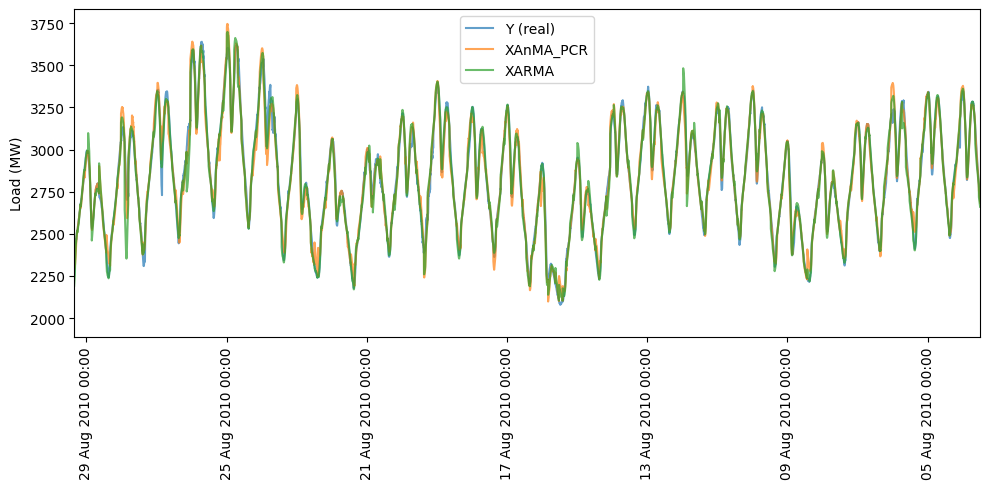

In [17]:
dict_best=(['XAnMA_PCR', 'XARMA'] )
plt.figure(figsize=(10, 5))
ax = plt.gca()
myFmt = mdates.DateFormatter("%d %b %Y %H:%M")
ax.xaxis.set_major_formatter(myFmt)
plt.plot(df_serie4_sel_copy.Date, df_serie4_sel_copy.SERIE4, label='Y (real)', alpha = 0.7)
for k in dict_best:
    dict_df[k]['Date'] = dates_by_index
    plt.plot(dict_df[k].Date, dict_df[k].y_pred, label=k, alpha = 0.7, markersize=4)#,marker='x'

plt.xlim(dates_by_index.iloc[[61220-41247 , 61777-49247]]) #[61220- 49247,61777- 49247]
plt.xticks(rotation = 90)
#plt.ylim([2200,3450])
# plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence') FAIL!
plt.ylabel('Load (MW)')

plt.legend()
# plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.savefig(dir+'episode1.pdf', transparent=True)
plt.show()

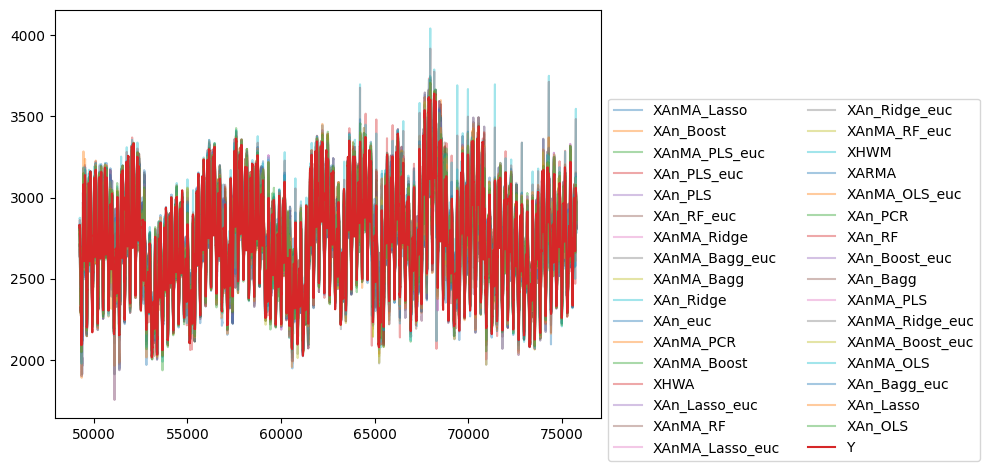

In [18]:
plt.figure(figsize=(10, 5))
for k in dict_df.keys():
    if 'X' in k:
        plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

# plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence') FAIL!
plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.show()

In [19]:
if False:
    plt.figure()
    for k in dict_df.keys():
        if 'X' not in k:
            plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

    plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

    plt.legend(bbox_to_anchor=(1, 0.8), ncol=2)
    plt.tight_layout()
    plt.show()

In [20]:
d_maes = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        mae_p  = mean_absolute_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)*100
    else:
        mae_p  = mean_absolute_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)*100
    d_maes.append({
        'mae' : mae_p,
        'mape' : mape_p,
        't' : dict_df[k].t_pred.mean(),
        't_std' : dict_df[k].t_pred.std(),
        'method' : k
    })
df_maes = pd.DataFrame(d_maes)
df_maes


,mae,mape,t,t_std,method
0,32.539299,1.197736,1.534966,7.764328e-02,XAnMA_Lasso
1,60.163801,2.210916,1.530106,2.397832e-02,XAn_Boost
2,68.937393,2.555921,2.012802,1.508128e-01,XAnMA_PLS_euc
3,22.596770,0.834888,1.526836,2.430252e-02,An_Boost
4,68.937393,2.555921,2.011306,1.506356e-01,XAn_PLS_euc
...,...,...,...,...,...
61,35.323704,1.302939,1.598901,3.918750e-02,An_PCR
62,47.949703,1.761819,1.533972,7.742466e-02,XAn_Lasso
63,28.060377,1.037354,2.011156,1.551048e-01,AnMA_PLS_euc
64,48.623465,1.783871,1.499294,4.371731e-02,XAn_OLS


In [21]:
df_maes_x = df_maes[df_maes.method.str.contains('X')]
df_maes_not_x = df_maes[~df_maes.method.str.contains('X')]

In [22]:
df_maes_not_x.method

3           An_Boost
5     AnMA_Ridge_euc
8         An_OLS_euc
9             An_PLS
10               HWA
11            An_OLS
15        AnMA_Ridge
18       An_Bagg_euc
20         An_RF_euc
24        AnMA_Boost
25      An_Ridge_euc
27      An_Boost_euc
28    AnMA_Lasso_euc
29      An_Lasso_euc
30          An_Lasso
34           AnMA_RF
35         AnMA_Bagg
36               HWM
37           An_Bagg
38        An_PLS_euc
39      AnMA_OLS_euc
40          AnMA_PLS
42          AnMA_PCR
44     AnMA_Bagg_euc
46    AnMA_Boost_euc
47       AnMA_RF_euc
50             An_RF
53          AnMA_OLS
55        AnMA_Lasso
59          An_Ridge
61            An_PCR
63      AnMA_PLS_euc
65               Per
Name: method, dtype: object

In [23]:
colors = np.repeat('blue', 33).tolist()
colors[7] = 'orange'
colors[8] = 'orange'
colors[9] = 'orange'

/tmp/ipykernel_6581/1973375342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_not_x.sort_values('mape', inplace = True)


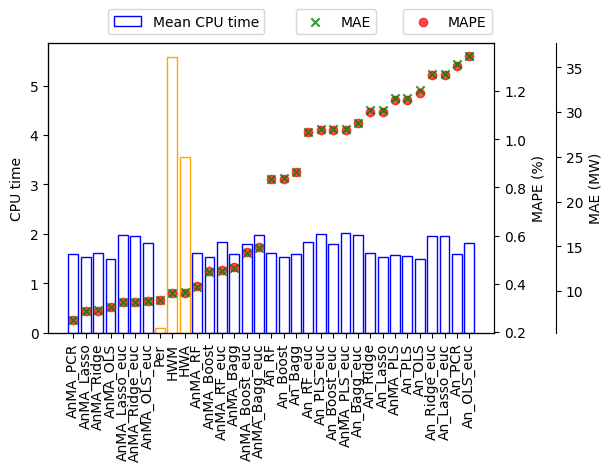

In [24]:
benchmarks = ['Per', 'HWA', 'HWM']
df_maes_not_x.sort_values('mape', inplace = True)
plt.figure() #
plt.bar(df_maes_not_x.method, df_maes_not_x.t, label='Mean CPU time', color = 'none', edgecolor = colors)
plt.xticks(rotation = 90)
plt.ylabel('CPU time')
#plt.axhline(y = df_maes_not_x.t.min(), color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, 1.14), fontsize = 10, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_not_x.method, df_maes_not_x.mape, marker = 'o', color = 'red', label = 'MAPE', alpha=0.7)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 10)
plt.ylabel('MAPE (%)')
ax2.yaxis.label.set_color('#000000')
ax2.tick_params(axis='y', colors='#000000')

ax3 = ax.twinx()
plt.scatter(df_maes_not_x.method, df_maes_not_x.mae, marker='x', color = 'green', label = 'MAE', alpha=0.8)
plt.legend(bbox_to_anchor = (0.75, 1.14), fontsize = 10, ncols = 1)
plt.ylabel('MAE (MW)')
ax3.spines.right.set_position(("data", 39))
ax3.yaxis.label.set_color('#000000')
ax3.tick_params(axis='y', colors='#000000')

plt.tight_layout()
plt.savefig(dir+'mape_vs_time.pdf', transparent=True)

plt.show()



In [25]:
df_maes_not_x.method

42          AnMA_PCR
55        AnMA_Lasso
15        AnMA_Ridge
53          AnMA_OLS
28    AnMA_Lasso_euc
5     AnMA_Ridge_euc
39      AnMA_OLS_euc
65               Per
36               HWM
10               HWA
34           AnMA_RF
24        AnMA_Boost
47       AnMA_RF_euc
35         AnMA_Bagg
46    AnMA_Boost_euc
44     AnMA_Bagg_euc
50             An_RF
3           An_Boost
37           An_Bagg
20         An_RF_euc
38        An_PLS_euc
27      An_Boost_euc
63      AnMA_PLS_euc
18       An_Bagg_euc
59          An_Ridge
30          An_Lasso
40          AnMA_PLS
9             An_PLS
11            An_OLS
25      An_Ridge_euc
29      An_Lasso_euc
61            An_PCR
8         An_OLS_euc
Name: method, dtype: object

In [26]:
xcolors = np.repeat('blue', 33).tolist()
xcolors[7] = 'orange'
xcolors[8] = 'orange'
xcolors

['blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

/tmp/ipykernel_6581/3163951021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_x.sort_values('mape', inplace = True)


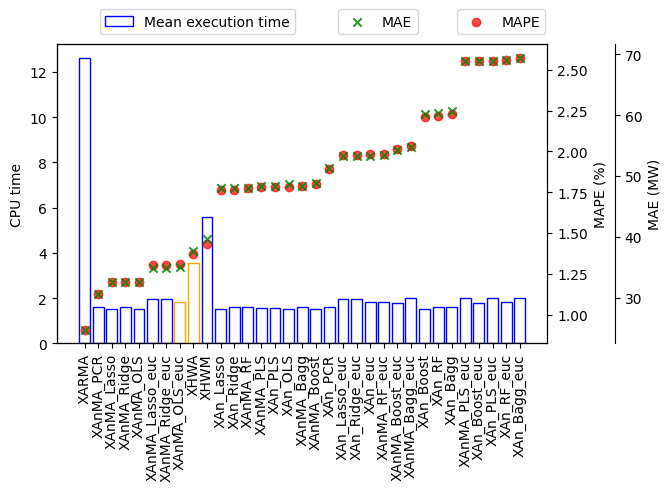

In [27]:
df_maes_x.sort_values('mape', inplace = True)
plt.figure(figsize=(7,5)) #
plt.bar(df_maes_x.method, df_maes_x.t, label='Mean execution time', color = 'none', edgecolor = xcolors)
plt.xticks(rotation = 90)
plt.ylabel('CPU time')
#plt.axhline(y = df_maes_x.t.min(), color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, 1.14), fontsize = 10, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_x.method, df_maes_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE', alpha=0.7)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 10)
plt.ylabel('MAPE (%)')
ax2.yaxis.label.set_color('#000000')
ax2.tick_params(axis='y', colors='#000000')

ax3 = ax.twinx()
plt.scatter(df_maes_x.method, df_maes_x.mae, marker = 'x', color = 'green', label = 'MAE', alpha=0.8)
plt.legend(bbox_to_anchor = (0.75, 1.14), fontsize = 10, ncols = 1)
plt.ylabel('MAE (MW)')
ax3.spines.right.set_position(("data", 39))
ax3.yaxis.label.set_color('#000000')
ax3.tick_params(axis='y', colors='#000000')

plt.tight_layout()
plt.savefig(dir+'mape_vs_timeX.pdf', transparent=True)

plt.show()

In [28]:
# df_maes_x.sort_values('mape', inplace = True)
# plt.figure()
# plt.bar(df_maes_x.method, df_maes_x.t, label='Mean execution time')
# plt.xticks(rotation = 90)
# plt.ylabel('Mean execution time')
# plt.axhline(y = df_maes_x.t.min(), color = 'black', label='Minimun time', linestyle = '--')
# plt.legend(bbox_to_anchor = (0.78, 1.14), fontsize = 12, ncols = 2)
# plt.tight_layout()

# ax = plt.gca()
# ax2 = ax.twinx()
# plt.scatter(df_maes_x.method, df_maes_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE')
# plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
# plt.ylabel('MAPE')

# plt.tight_layout()

# namefile = dir+'fig:mape_vs_timeX.pdf'
# plt.savefig(namefile, transparent=True)
# plt.show()

In [29]:
d_errors = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        ts_e = df_serie4x_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred

    else:
        ts_e = df_serie4_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred
    d_errors.append(pd.Series(ts_e))
df_errors = pd.DataFrame(d_errors)
df_errors = df_errors.T
df_errors.columns = dict_df.keys()
df_errors

,XAnMA_Lasso,XAn_Boost,XAnMA_PLS_euc,An_Boost,XAn_PLS_euc,AnMA_Ridge_euc,XAn_PLS,XAn_RF_euc,An_OLS_euc,An_PLS,...,XAnMA_Ridge_euc,XAnMA_Boost_euc,XAnMA_OLS,An_Ridge,XAn_Bagg_euc,An_PCR,XAn_Lasso,AnMA_PLS_euc,XAn_OLS,Per
0,33.147039,6.701088,44.163897,6.701088,44.163897,120.315967,39.971634,23.529109,117.235658,39.971634,...,120.315967,44.163897,27.244910,33.136926,6.948857,53.004237,33.147039,44.163897,27.244910,0.350977
1,29.912032,6.989801,46.268658,5.722389,46.268658,107.911312,37.155870,30.626798,104.610874,34.232847,...,131.412318,46.268658,23.826402,27.876920,16.730146,45.076210,29.912032,43.560925,23.826402,2.149170
2,19.962534,5.759974,57.555418,1.297880,57.555418,110.723582,28.883280,32.589130,107.561885,23.471539,...,119.503577,57.555418,15.604506,16.350397,12.598750,33.737479,19.962534,22.946610,15.604506,-3.090283
3,21.520780,8.005140,59.385304,3.777199,59.385304,109.330353,31.776658,36.082563,105.284159,24.117997,...,123.493818,59.385304,17.576944,16.876004,14.843916,32.286965,21.520780,26.775082,17.576944,2.245166
4,24.640399,8.860316,56.322126,4.428266,56.322126,113.718217,36.356429,37.174049,110.637385,26.219575,...,131.781403,56.322126,21.332298,18.922106,15.699092,32.505634,24.640399,7.143975,21.332298,0.855176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26515,-83.053865,-101.446535,-63.634323,NaN,-63.634323,NaN,-91.407459,-47.632377,NaN,NaN,...,-69.074769,-59.785234,-82.730059,NaN,-45.560791,NaN,-93.326798,NaN,-91.592492,NaN
26516,-73.620764,-40.748732,-60.422880,NaN,-60.422880,NaN,-81.766677,-42.456698,NaN,NaN,...,-68.267699,-56.573792,-72.934327,NaN,-48.592759,NaN,-83.893697,NaN,-81.796760,NaN
26517,-76.119223,-43.507982,-64.204839,NaN,-64.204839,NaN,-84.340069,-32.898208,NaN,NaN,...,-64.137153,-60.355750,-75.614571,NaN,-35.240400,NaN,-86.392156,NaN,-84.477004,NaN
26518,-80.519817,-47.179218,-70.238387,NaN,-70.238387,NaN,-88.551593,-36.971672,NaN,NaN,...,-68.662950,-66.389299,-80.018735,NaN,-41.221260,NaN,-90.792750,NaN,-88.881168,NaN


Prueba estadística a partir de los valores absolutos de los errores.

In [30]:
# Se usa para comparar datos ordenados y por pares
alpha = 0.05
friedman_res = stats.friedmanchisquare( df_errors.dropna().abs().AnMA_PCR, 
                                        df_errors.dropna().abs().Per, 
                                        df_errors.dropna().abs().HWM, 
                                        df_errors.dropna().abs().HWA)
print(friedman_res)
if (friedman_res.pvalue < alpha):
    print('grupos son diferentes')
else:
    print('grupos son distintos')

FriedmanchisquareResult(statistic=6626.0071105072275, pvalue=0.0)
grupos son diferentes


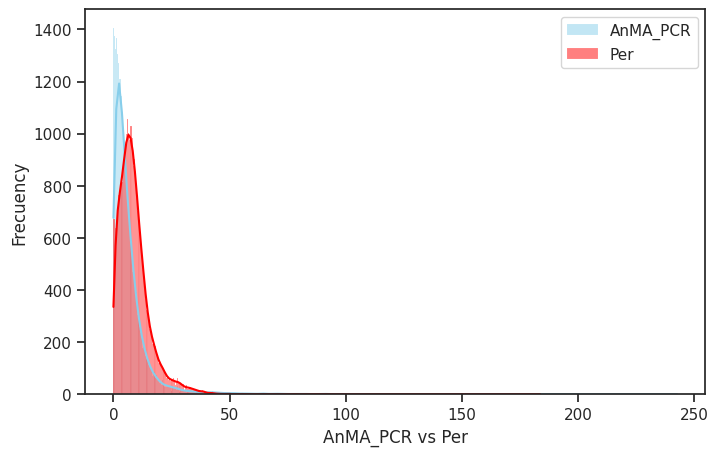

AnMA_PCR Per
WilcoxonResult(statistic=100106168.0, pvalue=0.0)
less distribution
###########



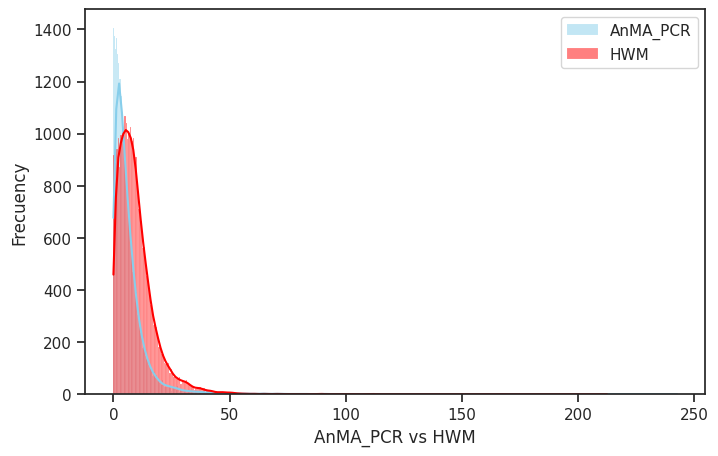

AnMA_PCR HWM
WilcoxonResult(statistic=95752847.0, pvalue=0.0)
less distribution
###########



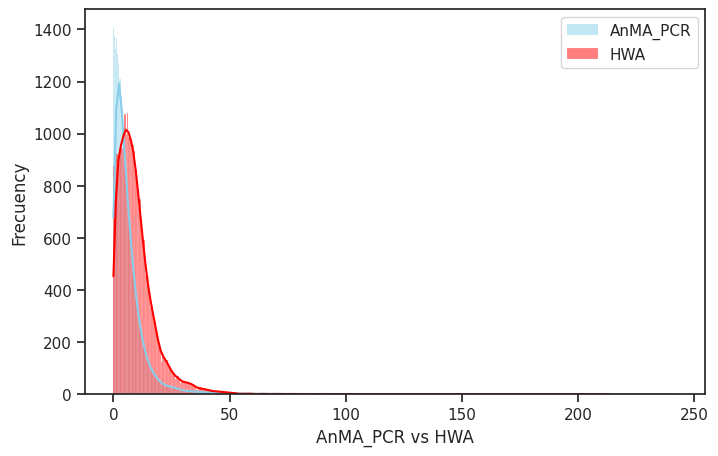

AnMA_PCR HWA
WilcoxonResult(statistic=94794076.0, pvalue=0.0)
less distribution
###########



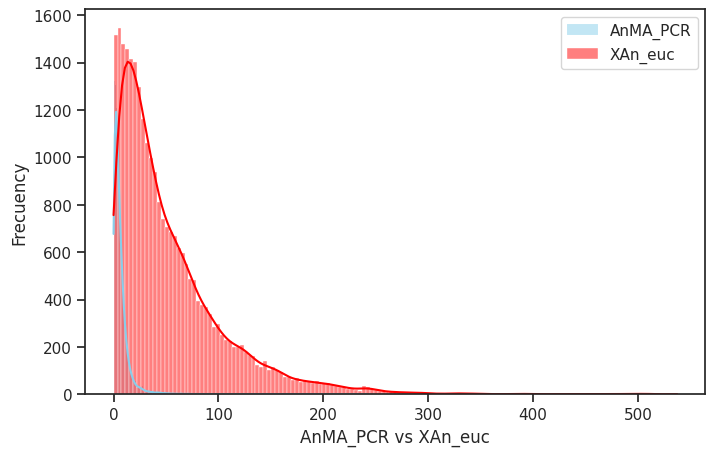

AnMA_PCR XAn_euc
WilcoxonResult(statistic=8748955.0, pvalue=0.0)
less distribution
###########



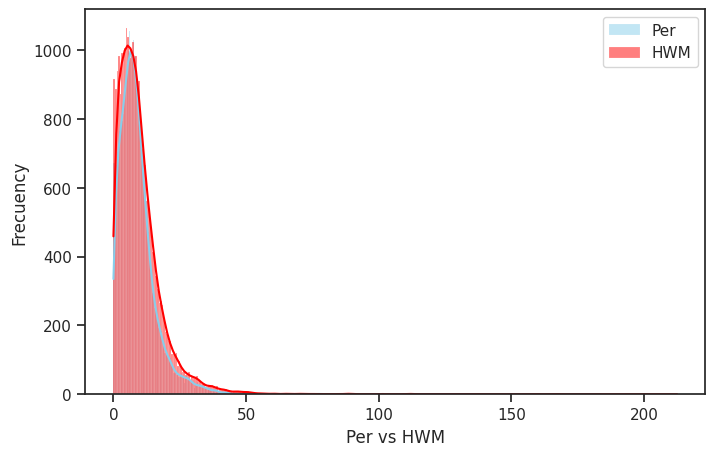

Per HWM
WilcoxonResult(statistic=150178634.0, pvalue=2.3056661540469366e-92)
less distribution
###########



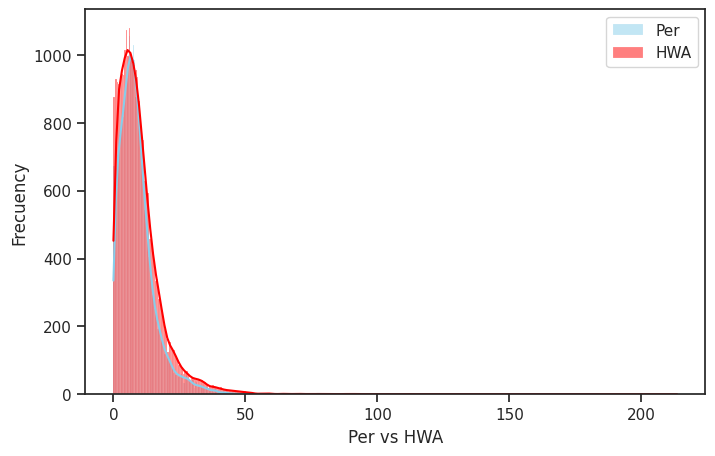

Per HWA
WilcoxonResult(statistic=146595488.0, pvalue=1.1812686184427637e-119)
less distribution
###########



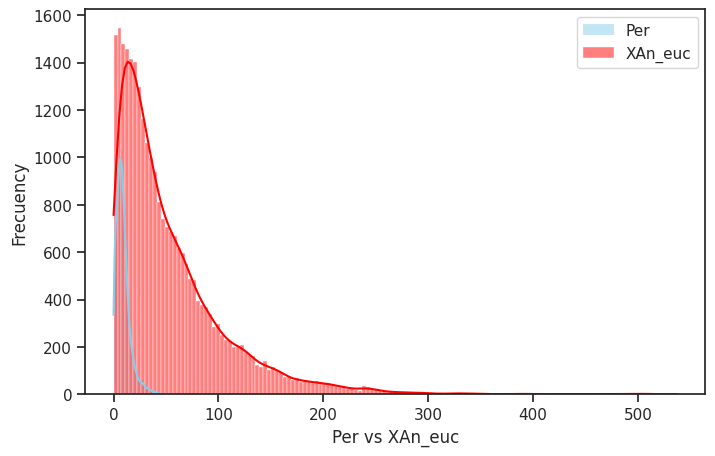

Per XAn_euc
WilcoxonResult(statistic=15135901.0, pvalue=0.0)
less distribution
###########



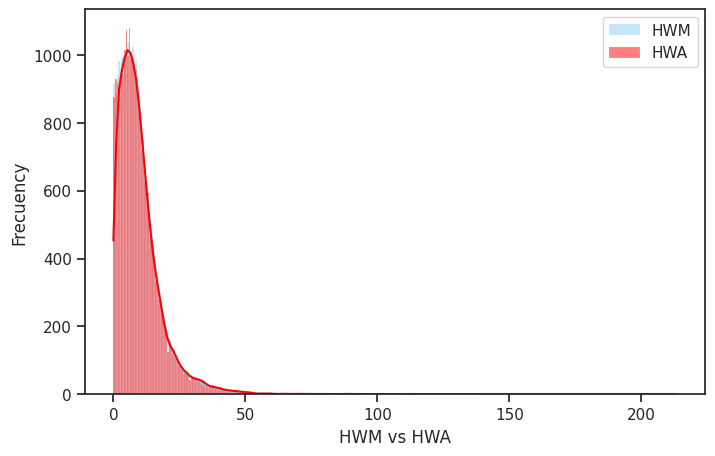

HWM HWA
WilcoxonResult(statistic=160862899.0, pvalue=2.817971155816861e-32)
less distribution
###########



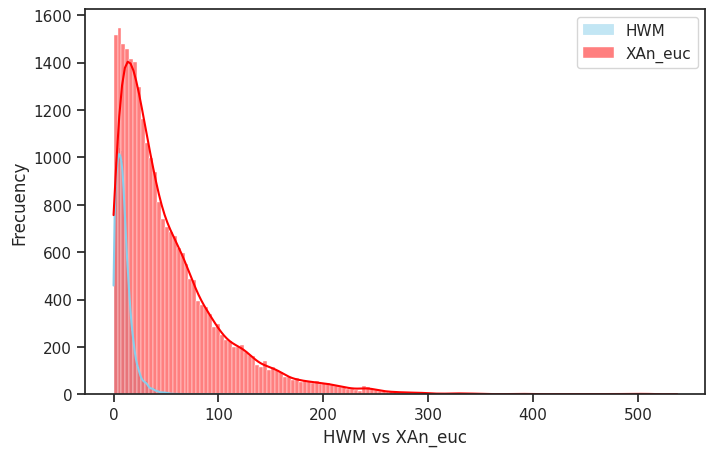

HWM XAn_euc
WilcoxonResult(statistic=17877233.0, pvalue=0.0)
less distribution
###########



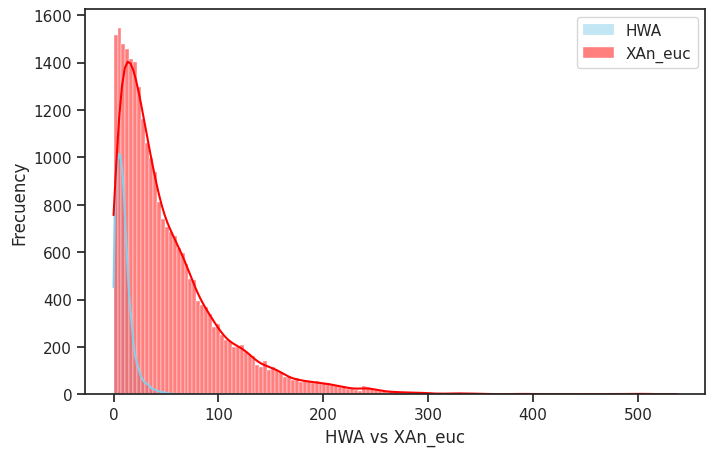

HWA XAn_euc
WilcoxonResult(statistic=18243076.0, pvalue=0.0)
less distribution
###########



In [31]:
contentands = [
    'AnMA_PCR',
    'Per',
    'HWM',
    'HWA',
    'XAn_euc'
]

alternative = 'less'

for c1 in range(len(contentands)):
    for c2 in range(c1 + 1, len(contentands)):
        if c1 != c2:
            sns.set(style="ticks") 
            plt.figure(figsize=(8, 5))
            ax = plt.gca()
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c1], color="skyblue", label=contentands[c1],   kde=True, ax=ax)
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c2], color="red",     label=contentands[c2], kde=True, ax=ax)
            ax.set_xlabel(f'{contentands[c1]} vs {contentands[c2]}')
            ax.set_ylabel('Frecuency')
            plt.legend()
            #axs[0, 0].get_yaxis().set_visible(False)
            plt.show()
            print(contentands[c1], contentands[c2])
            wil_res = stats.wilcoxon(df_errors.dropna().abs()[contentands[c1]], df_errors.dropna().abs()[contentands[c2]], alternative=alternative)
            print(wil_res)
            if (wil_res.pvalue < alpha):
                print(f'{alternative} distribution')
            else:
                print(f'{alternative} rejected')
        print('###########\n')

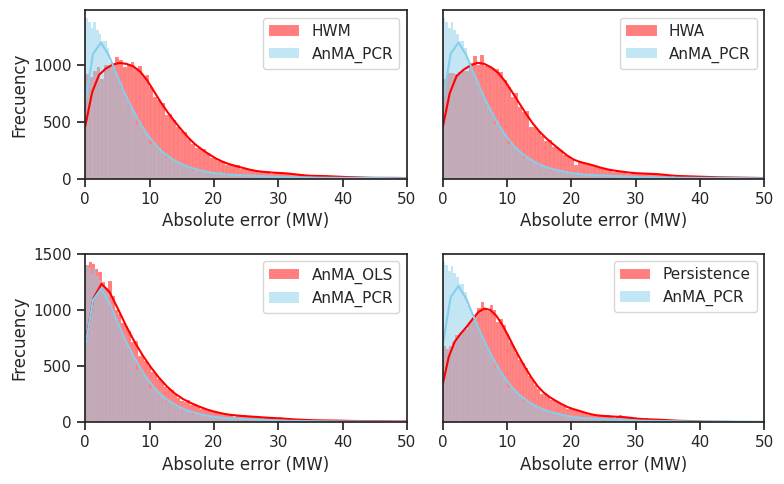

In [32]:
## UN PERIODO

sns.set(style="ticks") 
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

sns.histplot(data=df_errors.dropna().abs(), x="HWM",        color="red",   label="HWM", kde=True,    ax=axs[0, 0])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR", color="skyblue", label="AnMA_PCR",    kde=True, ax=axs[0, 0])

axs[0, 0].set_xlabel('Absolute error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="HWA",       color="red",     label="HWA",kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR",  color="skyblue", label="AnMA_PCR",  kde=True, ax=axs[0, 1])

axs[0, 1].set_xlabel('Absolute error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="AnMA_OLS",     color="red",    label="AnMA_OLS",kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR",  color="skyblue",label="AnMA_PCR",  kde=True, ax=axs[1, 0])

axs[1, 0].set_xlabel('Absolute error (MW)')
axs[1, 0].set_ylabel('Frecuency')

#axs[1, 0].get_yaxis().set_visible(False)
sns.histplot(data=df_errors.dropna().abs(), x="Per",      color="red",    label="Persistence",kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR", color="skyblue",label="AnMA_PCR", kde=True, ax=axs[1, 1])

axs[1, 1].set_xlabel('Absolute error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[0, 0].set_xlim([0,50])
axs[1, 0].set_xlim([0,50])
axs[0, 1].set_xlim([0,50])
axs[1, 1].set_xlim([0,50])

plt.tight_layout()
namefile = dir+'fig:error.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

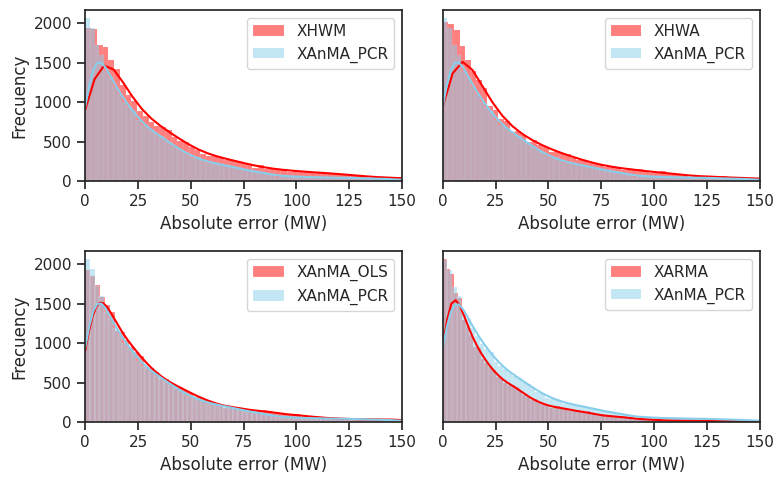

In [33]:
## TREINTA PERIODOS
sns.set(style="ticks") 
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

sns.histplot(data=df_errors.dropna().abs(), x="XHWM",         color="red",     label="XHWM",        kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",    color="skyblue", label="XAnMA_PCR",   kde=True, ax=axs[0, 0])

axs[0, 0].set_xlabel('Absolute error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="XHWA",         color="red",       label="XHWA",      kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",    color="skyblue",   label="XAnMA_PCR", kde=True, ax=axs[0, 1])

axs[0, 1].set_xlabel('Absolute error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="XARMA",  color="red",        label="XARMA", kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",  color="skyblue",    label="XAnMA_PCR", kde=True, ax=axs[1, 1])


axs[1, 0].set_xlabel('Absolute error (MW)')
axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_OLS",  color="red",        label="XAnMA_OLS", kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",  color="skyblue",    label="XAnMA_PCR", kde=True, ax=axs[1, 0])


axs[1, 1].set_xlabel('Absolute error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[0, 0].set_xlim([0,150])
axs[1, 0].set_xlim([0,150])
axs[0, 1].set_xlim([0,150])
axs[1, 1].set_xlim([0,150])

plt.tight_layout()
namefile = dir+'fig:errorX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

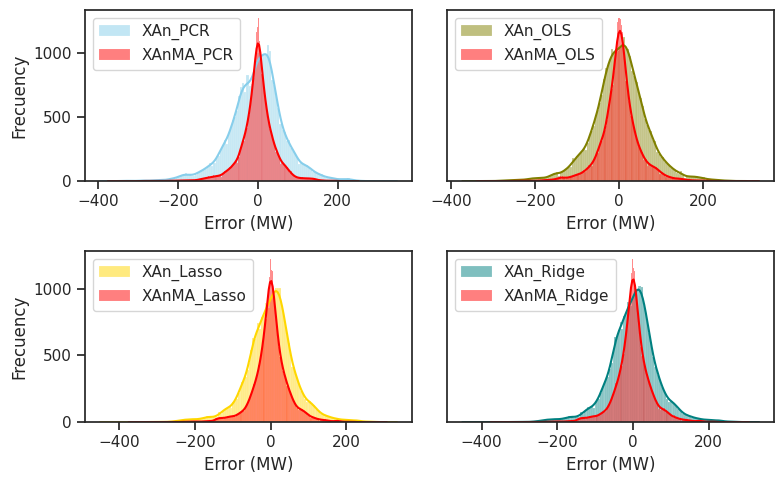

In [34]:

sns.set(style="ticks") 
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="XAn_PCR",    color="skyblue", label="XAn_PCR",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="XAnMA_PCR",  color="red",     label="XAnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="XAn_OLS",    color="olive",   label="XAn_OLS",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="XAnMA_OLS",  color="red",     label="XAnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="XAn_Lasso",  color="gold",    label="XAn_Lasso",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="XAnMA_Lasso",color="red",     label="XAnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Error (MW)')

axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="XAn_Ridge",  color="teal",    label="XAn_Ridge",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="XAnMA_Ridge",color="red",     label="XAnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.tight_layout()
namefile = dir+'fig:multipleX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

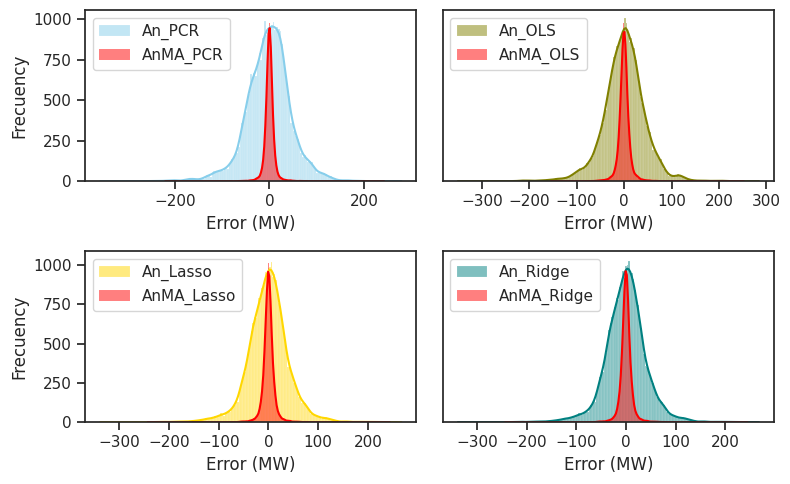

In [35]:
sns.set(style="ticks")
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="An_PCR",    color="skyblue", label="An_PCR",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="AnMA_PCR",  color="red",     label="AnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="An_OLS",    color="olive",   label="An_OLS",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="AnMA_OLS",  color="red",     label="AnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="An_Lasso",  color="gold",    label="An_Lasso",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="AnMA_Lasso",color="red",     label="AnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Error (MW)')
axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="An_Ridge",  color="teal",    label="An_Ridge",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="AnMA_Ridge",color="red",     label="AnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.tight_layout()
namefile = dir+'fig:multiple.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [36]:
df_errors_x = df_errors[[c for c in df_errors.columns if 'X' in c]]
df_errors_not_x = df_errors[[c for c in df_errors.columns if 'X' not in c]]

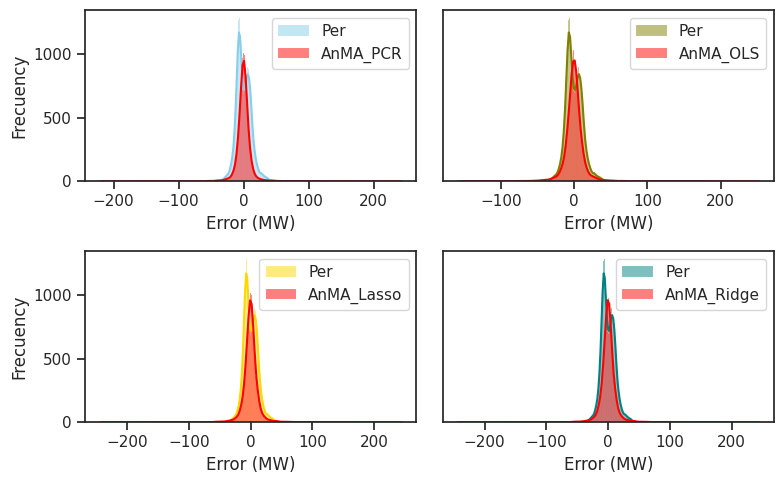

In [37]:
sns.set(style="ticks")
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="Per",    color="skyblue", label="Per",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="AnMA_PCR",  color="red",     label="AnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="Per",    color="olive",   label="Per",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="AnMA_OLS",  color="red",     label="AnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="Per",  color="gold",    label="Per",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="AnMA_Lasso",color="red",     label="AnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Error (MW)')
axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="Per",  color="teal",    label="Per",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="AnMA_Ridge",color="red",     label="AnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.tight_layout()
namefile = dir+'fig:multiplePER.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

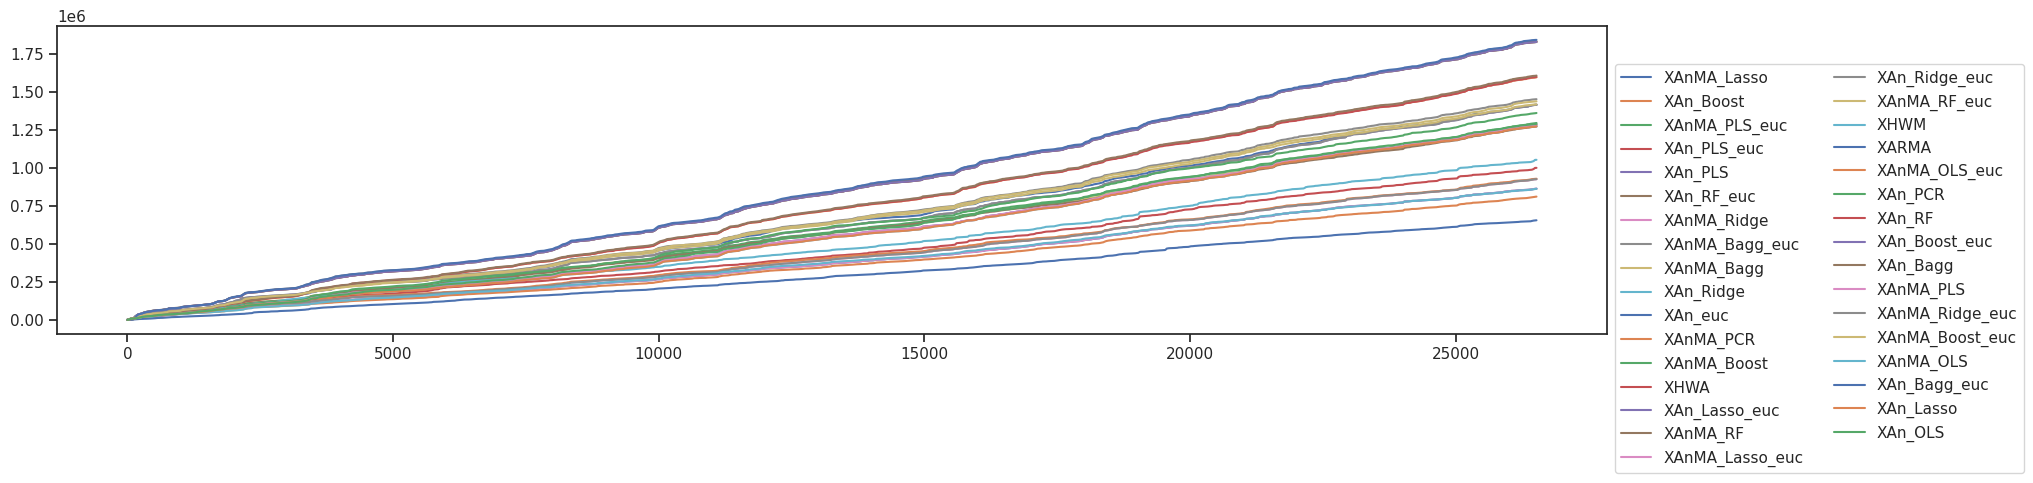

In [38]:
plt.figure(figsize=(20, 4))
for c in df_errors_x.columns:
    plt.plot(df_errors_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

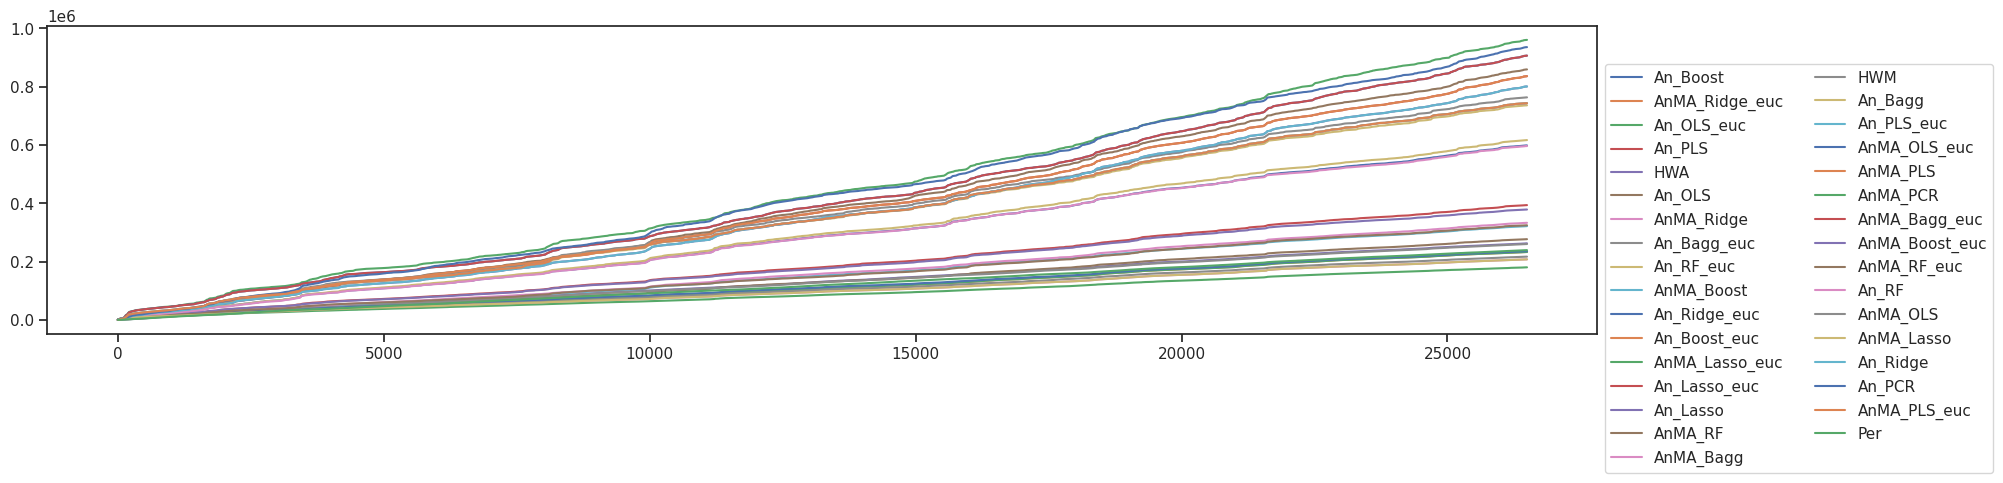

In [39]:
plt.figure(figsize=(20, 4))
for c in df_errors_not_x.columns:
    plt.plot(df_errors_not_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

In [40]:
df_errors_x_samp = df_errors_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_x_melt = df_errors_x_samp.melt(var_name='models', value_name='vals')
df_errors_x_melt.loc

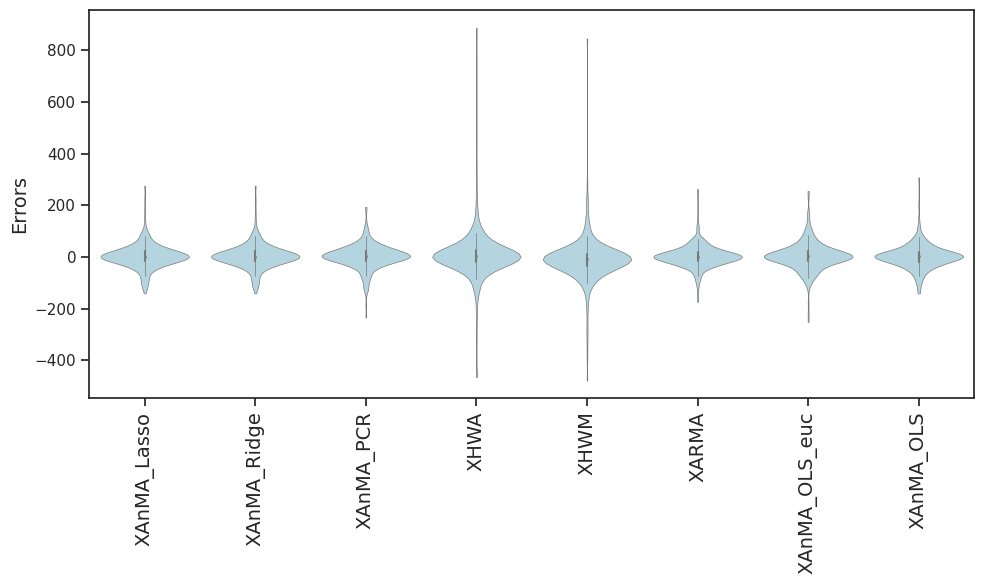

In [41]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
data=df_errors_x_melt.loc[  (df_errors_x_melt['models']=='XAnMA_PCR'    )  |
                            (df_errors_x_melt['models']=='XAnMA_Lasso'  )  |
                            (df_errors_x_melt['models']=='XAnMA_Ridge'  )  |
                            (df_errors_x_melt['models']=='XAnMA_OLS'    )  |
                            (df_errors_x_melt['models']=='XAnMA_OLS_euc')  |
                            (df_errors_x_melt['models']=='XHWA'         )  |
                            (df_errors_x_melt['models']=='XHWM'         )  | 
                            (df_errors_x_melt['models']=='XARMA'       )  ]
                                                                     
data.sort_values(by=['vals'], ascending=False)
sns.violinplot(x="models", y="vals", data=data, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
namefile = dir+'fig:violinsX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [42]:
df_errors_not_x_samp = df_errors_not_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_not_x_melt = df_errors_not_x_samp.melt(var_name='models', value_name='vals')
df_errors_not_x_melt

,models,vals
0,An_Boost,-24.316781
1,An_Boost,-23.692456
2,An_Boost,2.627082
3,An_Boost,2.216678
4,An_Boost,23.648355
...,...,...
8740,Per,10.848340
8741,Per,10.395264
8742,Per,15.995459
8743,Per,6.876904


In [43]:
type(data)

pandas.core.frame.DataFrame

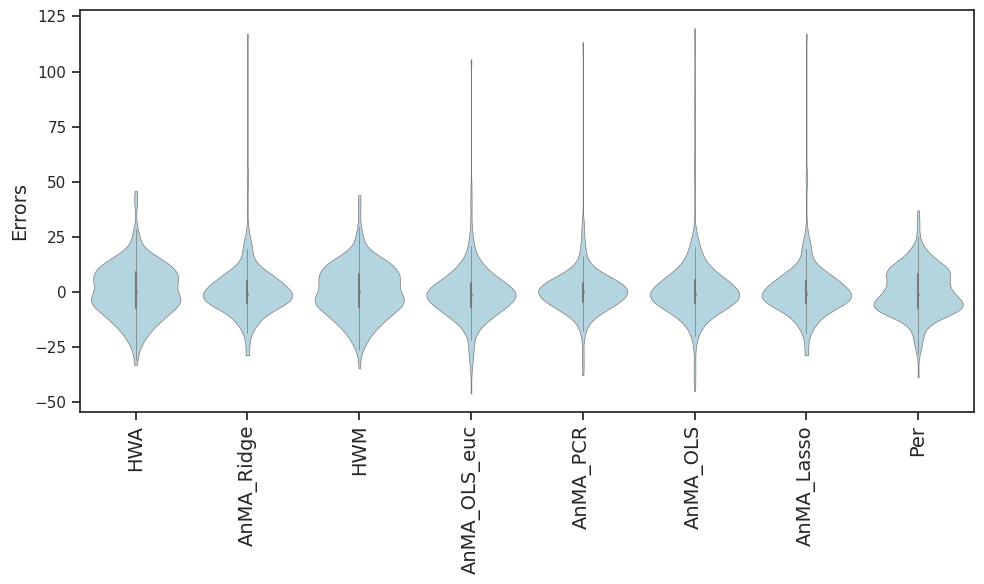

In [44]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
data=df_errors_not_x_melt.loc[  (df_errors_not_x_melt['models']=='AnMA_PCR'    )  |
                                (df_errors_not_x_melt['models']=='AnMA_Lasso'  )  |
                                (df_errors_not_x_melt['models']=='AnMA_Ridge'  )  |
                                (df_errors_not_x_melt['models']=='AnMA_OLS'    )  |
                                (df_errors_not_x_melt['models']=='AnMA_OLS_euc')  |
                                (df_errors_not_x_melt['models']=='Per'         )  |
                                (df_errors_not_x_melt['models']=='HWA'         )  | 
                                (df_errors_not_x_melt['models']=='HWM'         )   ]
                                                                     
data.sort_values(by=['vals'], ascending=False)

sns.violinplot(x="models", y="vals", data=data, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')

plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
namefile = dir+'fig:violins.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

## Inference test

In [45]:
from scipy.stats import shapiro
import scipy.stats as stats

In [46]:
def means_test(alternative, labels, samples,alpha=0.05):
## Ho(Accepted): The difference between the pairs follows a symmetric distribution around zero.
## Ha(Rejected): The difference between the pairs does not follow a symmetric distribution around zero.
## We conduct the Mann-whitney U or two-sample t test alternative= {'two-sided', 'greater', 'less'} 
# ==============================================================================
## Tipo de prueba
    
	Ho   = labels[0]+'-'+labels[1]+': means the samples is of the same distribution.'
	decision1   = 'We fail to reject the Ho; Ho accepted:'
	if alternative == 'less':
		message1='\t: We fail to reject the null hypothesis; Ho accepted: \n\tThe difference between the pairs follows a symmetric distribution around zero.'
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
	if alternative == 'greater':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
	if alternative == 'two-sided':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t The mean difference between the pairs not follows a symmetric distribution around zero.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.'

	## Checamos normalidad 
	normal=[]
	for s in samples:
		if shapiro(s).pvalue > alpha:
			normal.append(True)
		else:
			# print(labels[i],'\t:',round(shapiro(s).statistic,4),'\t',round(shapiro(s).pvalue,4),'\tWe reject the null hypothesis and accept Ha: Sample is not from the normal distributions.')
			normal.append(False)

	## Checamos homocedasticidad
	levene_test = stats.levene(samples[0], samples[1], center='mean')
	equalvar=False
	if levene_test.pvalue > alpha:
		equalvar =True
	#   print('[Harjk,Harduc]\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe fail to reject the null hypothesis; Ho accepted: the variances are equal across all samples. (Po>0.05)')
	# else:
	#   print(labels[0],labels[1],'\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe reject the Ho and accept Ha: the variances are not equal across all samples. (Po<=0.05)')
	test = ''
	if normal[0]==True and normal[1]==True and equalvar==True: ## T-test two samples
		test = 'T-test for two samples'
		# print(labels[0],labels[1],stats.ttest_ind(samples[0], samples[1], alternative=alternative) )
		if stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	else: ## Mann-whitney U Test
		test = 'Mann-whitney'
		# print(labels[0],labels[1],stats.mannwhitneyu(samples[0], samples[1], alternative=alternative) )
		if stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	  
## Kruskal-Wallis test discussion:  In this example, the test statistic comes out to be equal to 87 and the corresponding p-value is 2.1856E-17. 
## (As the p-value is not less than 0.05, we cannot reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to claim that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)
## (As the p-value is less than 0.05, we reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to reject that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)

In [47]:
def varianze_test_levene(labels,samples,alpha=0.05):
## Ho(Accepted): We fail to reject the null hypothesis; Ho accepted: the variances are equal between samples.
## Ha(Rejected): We reject the Ho and accept Ha: the variances are not equal between samples.
## We conduct the Levene test
# ==============================================================================
    
	Ho   = labels[0]+'-'+labels[1]+':the variances are equal between samples'
	decision1   = 'We fail to reject the Ho; Ho accepted'
	decision2   = 'We reject the Ho and accept Ha: the variances are not equal between samples'
	test='Levene'
	## Checamos homocedasticidad
	levene_test = stats.levene(samples[0], samples[1], center='mean')
	equalvar=False

	if levene_test.pvalue > alpha:
		equalvar = True
		print(Ho,',',test,',', round(stats.levene(samples[0],samples[1], center='mean').pvalue,4),',',decision1)
	else:
		print(Ho,',',test,',', round(stats.levene(samples[0],samples[1], center='mean').pvalue,4),',',decision2)

In [48]:
df_maes_x.iloc[:7].method.to_list()

['XARMA',
 'XAnMA_PCR',
 'XAnMA_Lasso',
 'XAnMA_Ridge',
 'XAnMA_OLS',
 'XAnMA_Lasso_euc',
 'XAnMA_Ridge_euc']

In [49]:
df_errors_x_best = df_errors_x[df_maes_x.iloc[:7].method.to_list()]


In [50]:
#df_errors_x_best['XHWM'].abs().values

In [51]:
samples = [list(df_errors_x_best[c].abs().values) for c in df_errors_x_best.columns]
labels = df_errors_x_best.columns
means  = []

print('\n RANKING==============================================================================\n')
i = 0
ordered_labels  = []
ordered_samples = []
for s in samples:
  means.append((i,np.mean(s)))
  i = i + 1
means.sort(key=lambda tup: tup[1], reverse=False) ##reverse=False

for m in means:  
  ordered_samples.append(samples[m[0]])
  ordered_labels.append(labels[m[0]])
  print(labels[m[0]],m[1])

print('\n Ha:less,alpha=0.05=====================================================================\n')
print('Means difference hypothesis test summary')
print('Null hypothesis,Test,Significance,Decision')
for i in range(len(ordered_labels)):
	for j in range(len(ordered_labels)):
		if j > i:
			means_test('two-sided',(ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)

print('\n Ha:less,alpha=0.05=====================================================================\n')
print('varianze difference hypothesis test summary')
print('Null hypothesis,Test,Significance,Decision')
for i in range(len(ordered_labels)):
	for j in range(len(ordered_labels)):
		if j > i:
			varianze_test_levene((ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)



 RANKING==============================================================================

XARMA 24.703518591707784
XAnMA_PCR 30.573666762977847
XAnMA_OLS 32.50196527724006
XAnMA_Lasso 32.53929887527497
XAnMA_Ridge 32.546958454715615
XAnMA_Lasso_euc 34.89341258421487
XAnMA_Ridge_euc 34.89943271097779

 Ha:less,alpha=0.05=====================================================================

Means difference hypothesis test summary
Null hypothesis,Test,Significance,Decision
XARMA-XAnMA_PCR: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XARMA-XAnMA_OLS: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XARMA-XAnMA_Lasso: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject t

/home/uriel/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


XARMA-XAnMA_Ridge: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XARMA-XAnMA_Lasso_euc: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XARMA-XAnMA_Ridge_euc: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XAnMA_PCR-XAnMA_OLS: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XAnMA_PCR-XAnMA_Lasso: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of 